## Pipeline Corrosion_protein_classification
on Sequence Analysis and Functional Prediction

In [ ]:
import os
os.path.exists('/content/drive/MyDrive')

False

In [1]:
# Colab specific
from google.colab import drive
from google.colab import files
import os

drive.mount('/content/drive')

#change the path
os.chdir('/content/drive/MyDrive/MIC/data_picrust')

Mounted at /content/drive


In [2]:
# Making sure to use same python version for compatibility
!sudo apt-get update -y
!sudo apt-get install python3.10
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!python --version

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,691 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-up

In [3]:
# Set up memory footprint support libraries
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
%pip install humanize
%pip install memory_profiler
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('Using a high-RAM runtime!')

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=7532f5d0cb90378d9738f1902c2521a90cbf0992b9e8fb732acc86722a63e7df
  Stored in directory: /root/.cache/pip/wheels/2b/4d/8f/55fb4f7b9b591891e8d3f72977c4ec6c7763b39c19f0861595
Successfully built gputil
Runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [4]:
!pip install psutil
import psutil
!pip install biopython
from IPython import get_ipython
from IPython.display import display
!pip install biom-format
%pip install umap-learn
!pip install lxml pandas
!pip install pyarrow
!pip install kneed
!pip install scipy
%pip install "dask[complete]"
!pip install fuzzywuzzy
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 36.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for biom-format: filename=biom_format-2.1.16-cp311-cp311-linux_x86_64.whl size=12182991 sha256=4c956d0e411c4d6d852370543e52792220f384ddb97160555ed2ae544db01d3d
  Stored in directory: /root/.cache/pip/wheels/a5/6b/58/a879e8fbae2479a3d1a68719f3a062fe62701d6494f1b74f5e
Successfully built biom-format
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.4 MB/s eta 0:00:00


In [5]:
# Standard library imports
import os
import sys
import ast
import subprocess
import logging
import time
from datetime import datetime
import shutil
from io import StringIO
from pathlib import Path
import re
import json
# Data processing and analysis
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import to_rgba, LinearSegmentedColormap
import matplotlib.patches as mpatches
# Machine learning and statistical analysis
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
import umap
import scipy
from scipy import stats
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy as sch
from statsmodels.stats.multitest import multipletests
from scipy.spatial.distance import pdist
from scipy.stats import spearmanr, kruskal, mannwhitneyu
from kneed import KneeLocator
from scipy.signal import savgol_filter
from joblib import Parallel, delayed

# Bioinformatics
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from biom import Table, load_table
from biom.util import biom_open

# Web and data retrieval
import requests
import xml.etree.ElementTree as ET
from lxml import etree

# Utility libraries
import gzip
import random
from natsort import natsorted
from typing import Dict, List, Tuple, Set, Optional
import pickle
import gc
import joblib
import h5py
import os
os.environ['DISPLAY'] = ':0'

In [6]:
# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

# Directory Structure Definitions
SIMPLE_BASE = {
    'known': 'simple_known_mic',
    'other': 'simple_candidate_mic'
}

DETAILED_BASE = {
    'known': 'detailed_known_mic',
    'pure_checked': 'detailed_pure_checked_mic',
    'pure_core': 'detailed_pure_core_mic',
    'checked_core': 'detailed_checked_core_mic'
}

SUBDIRS = [
    'EC_predictions',
    'pathway_predictions',
    'KO_predictions',
    'other_picrust_files'
]


# Base Paths
if "google.colab" in sys.modules:
    base_dir = Path("/content/drive/MyDrive/MIC/data_picrust")
else:
    base_dir = Path("/home/beatriz/MIC/2_Micro/data_picrust")

#base dir for small files to git
base_dir = Path("/home/beatriz/MIC/2_Micro/data_picrust")

abundance_excel= Path("/home/beatriz/MIC/2_Micro/data_Ref/merged_to_sequence.xlsx")
fasta_file_final = Path("/home/beatriz/MIC/2_Micro/data_qiime/results_match_gg/final_sequences_gg.fasta")
aligned_fasta = Path("/home/beatriz/MIC/2_Micro/data_qiime/results_match_gg/aligned-dna-sequences_gg.fasta")

# Create output directory if it doesn't exist
output_base = base_dir / "output_base"
output_base.mkdir(parents=True, exist_ok=True)
# large galaxies input and output #large size dir for large files hosted instead in kaggle
large_dir = Path("/home/beatriz/MIC")
large_dir.mkdir(parents=True, exist_ok=True)
# databases
db_dir = large_dir / "Databases"
# input galaxies and uniprots
input_galaxy = large_dir / "data_galaxies"
# Directory to output large files # eccontris, compilated db
output_large = large_dir / "output_large"
output_large.mkdir(parents=True, exist_ok=True)

# for colab
# Create output directory if it doesn't exist
base_dir = Path("/content/drive/MyDrive/MIC/data_picrust/")
base_dir.mkdir(parents=True, exist_ok=True)
abundance_excel= Path("/content/drive/MyDrive/MIC/data_picrust/merged_to_sequence.xlsx")
fasta_file_final = Path("/content/drive/MyDrive/MIC/data_picrust/final_sequences_gg.fasta")
aligned_fasta = Path("/content/drive/MyDrive/MIC/data_picrust/aligned-dna-sequences_gg.fasta")

output_base = base_dir  # Separate output directory
output_base.mkdir(parents=True, exist_ok=True)
large_dir = Path("/content/drive/MyDrive/MIC/")
large_dir.mkdir(parents=True, exist_ok=True)
db_dir = Path("/content/drive/MyDrive/MIC/Databases")
db_dir.mkdir(parents=True, exist_ok=True)
input_galaxy = large_dir / "data_galaxies"
# Directory to output large files # eccontris, compilated db
output_large = large_dir / "output_large"
output_large.mkdir(parents=True, exist_ok=True)
'''
# For Kaggle work
# Input datasets (read-only in Kaggle)
base_dir = Path("/kaggle/input/new-picrust") #base dir for small files to git /kaggle/input/new-picrust

# Files in small input directory
abundance_excel= base_dir / "merged_to_sequence.xlsx" # inside input small sizes input
fasta_file_final = base_dir  / "final_sequences_gg.fasta" # inside input small sizes

# Output for small files has to be changed for vscode no to push it to git
output_base = Path("/kaggle/working/output_base")
output_base.mkdir(parents=True, exist_ok=True)
#datasets large galaxies and databases
db_dir = Path("/kaggle/input/databases/Databases")
input_galaxy = Path("/kaggle/input/data-galaxies")

# Directory to output large files # eccontris, compilated db
large_dir =  Path("/kaggle/working/")

# Directory to output large files # eccontris, compilated db
output_large = large_dir / "output_large"
output_large.mkdir(parents=True, exist_ok=True)'''

'\n# For Kaggle work\n# Input datasets (read-only in Kaggle)\nbase_dir = Path("/kaggle/input/new-picrust") #base dir for small files to git /kaggle/input/new-picrust\n\n# Files in small input directory\nabundance_excel= base_dir / "merged_to_sequence.xlsx" # inside input small sizes input\nfasta_file_final = base_dir  / "final_sequences_gg.fasta" # inside input small sizes\n\n# Output for small files has to be changed for vscode no to push it to git\noutput_base = Path("/kaggle/working/output_base")\noutput_base.mkdir(parents=True, exist_ok=True)\n#datasets large galaxies and databases\ndb_dir = Path("/kaggle/input/databases/Databases")\ninput_galaxy = Path("/kaggle/input/data-galaxies")\n\n# Directory to output large files # eccontris, compilated db\nlarge_dir =  Path("/kaggle/working/")\n\n# Directory to output large files # eccontris, compilated db\noutput_large = large_dir / "output_large"\noutput_large.mkdir(parents=True, exist_ok=True)'

In [7]:
# Integrated taxa from origin genus as headers with levels 6 for the genera, 7 for the GID, muss be cleaned
Integrated_T = pd.read_excel(abundance_excel, sheet_name='core_check_usual_taxa', header=[0,1,2,3,4,5,6,7], engine ='openpyxl')
# Drop first row (index 0) and first column in one chain
Integrated_T = Integrated_T.drop(index=0).drop(Integrated_T.columns[0], axis=1)
Integrated_T= Integrated_T.astype({'Sites': str})
Integrated_T['Sites'] = Integrated_T['Sites'].fillna('Source')
# Remove 'Unnamed' level names
Integrated_T.columns = Integrated_T.columns.map(lambda x: tuple('' if 'Unnamed' in str(level) else level for level in x))
# Changing dtypes to category whiles respecting structure
Integrated_T["Category"] = Integrated_T["Category"].astype("Int64")
Integrated_T= Integrated_T.set_index("Sites")
pre_Integrated = Integrated_T.T

In [8]:
# Load colab already has corrected the name and put identifiers at this point and category included
ECcontri_Uniprot_enriched = pd.read_parquet(output_large / 'ECcontri_Uniprot_enriched.parquet')

In [9]:
# Define category dict outside
category_dict = Integrated_T.T.iloc[0, 0:-1].to_dict()

# Define colors and categories
category_colors = {1: '#008800',  # Dark green
                   2: '#FF8C00',  # Dark orange
                   3: '#FF0000'}   # Red

categories_labels = {1: 'Normal Operation',
              2: 'Early Warning',
              3: 'System Failure'}

# 9.5. Filtering pairs Bacteria-Protein by significance to the risk category

In [12]:
sample_contri = ECcontri_Uniprot_enriched.sample(n=5000, random_state=42) # row == zeile

In [13]:
def prepare_base_matrix_stats(eccontri_df):
    # Ensure 'idx' is the index if it's not already
    if 'idx' not in eccontri_df.index.names:
        eccontri_df = eccontri_df.set_index('idx')

    # Group by 'Category', 'Genus', and 'protein_name', and sum 'norm_abund_contri'
    base_matrix = eccontri_df.groupby(['Genus', 'protein_name', 'Category'], observed=True, as_index=True)['norm_abund_contri'].sum()

    base_matrix = base_matrix.reset_index(drop=False)
    return base_matrix

In [14]:
base_matrix = prepare_base_matrix_stats(sample_contri)

In [109]:
def perform_abundance_analysis(base_matrix, eccontri_df, alpha=0.05, n_jobs=-1):
    """
    Performs statistical analysis on protein-genus pairs focusing on abundance patterns.

    This function:
    1. Identifies patterns based on category presence/absence AND abundance
    2. Performs statistical tests where possible (pairs in multiple categories)
    3. Identifies category-specific and abundant proteins

    Parameters:  base_matrix :  DataFrame with columns 'Genus', 'protein_name', 'Category', 'norm_abund_contri'
    alpha : float, default=0.05   Significance level for statistical tests
    n_jobs : int, default=-1   Number of parallel jobs to run

    Returns:
    --------
    tuple: (results_df, category_stats)
        results_df: DataFrame with statistical results and patterns
        category_stats: Dictionary with summary statistics
    """
    # Start timer
    start_time = time.time()

    # Get unique categories and genus-protein pairs
    categories = sorted(base_matrix["Category"].unique())
    print(f"Found {len(categories)} categories: {categories}")

    pairs = base_matrix[['Genus', 'protein_name']].drop_duplicates()
    print(f"Total unique genus-protein pairs unique: {len(pairs)}")

    # Pre-compute statistics for all genus-protein-category combinations
    print("Computing statistics for all genus-protein-category combinations...")
    grouped_stats = base_matrix.groupby(['Genus', 'protein_name', 'Category'])['norm_abund_contri'].agg([
        ('mean', 'mean'),
        ('median', 'median'),
        ('std', 'std'),
        ('count', 'count'),
        ('sum', 'sum'),
        ('values', lambda x: list(x))
    ]).reset_index()

    # Convert to dictionary for faster lookups and Create a list of tuples for keys and a list of dictionaries for values
    keys = list(zip(grouped_stats['Genus'], grouped_stats['protein_name'], grouped_stats['Category'])) #generator
    values = grouped_stats[['mean', 'median', 'std', 'count', 'sum', 'values']].to_dict('records')
    grouped_dict = dict(zip(keys, values))

    # Create a pivot table to easily see category presence
    category_pivot = grouped_stats.pivot_table(
        index=['Genus', 'protein_name'],
        columns='Category',
        values='count',
        fill_value=0
    ).reset_index()

    # Add columns for category presence
    for cat in categories:
        category_pivot[f'present_in_cat{cat}'] = category_pivot[cat] > 0

    def cliffs_delta(x, y):
        """
        Calculate Cliff's Delta - a non-parametric effect size measure.
        Returns value between -1 and 1, where:
        -1: all values in y > values in x
        +1: all values in x > values in y
        0: distributions overlap completely
        """
        # Count comparisons where x > y and y > x
        greater = 0
        less = 0

        for i in x:
            for j in y:
                if i > j:
                    greater += 1
                elif i < j:
                    less += 1

        # Calculate delta
        delta = (greater - less) / (len(x) * len(y))
        return delta

    # Define function to process each pair
    def process_pair(row_data):
        # Get category presence for this pair
        genus = row_data['Genus']
        protein = row_data['protein_name']

        pivot_row = category_pivot[
            (category_pivot['Genus'] == genus) &
            (category_pivot['protein_name'] == protein)
        ]

        if pivot_row.empty:
            return None

        pivot_row = pivot_row.iloc[0]

        # Check which categories have data
        present_cats = []
        for cat in categories:
            if pivot_row[f'present_in_cat{cat}']:
                present_cats.append(cat)

        # Skip if no categories have data (shouldn't happen)
        if not present_cats:
            return None

        # Compile stats for each category
        cat_stats = {}
        for cat in categories:
            key = (genus, protein, cat)
            if key in grouped_dict:
                cat_stats[f"mean_cat{cat}"] = grouped_dict[key]['mean']
                cat_stats[f"median_cat{cat}"] = grouped_dict[key]['median']
                cat_stats[f"std_cat{cat}"] = grouped_dict[key]['std']
                cat_stats[f"count_cat{cat}"] = grouped_dict[key]['count']
                cat_stats[f"sum_cat{cat}"] = grouped_dict[key]['sum']
            else:
                cat_stats[f"mean_cat{cat}"] = np.nan
                cat_stats[f"median_cat{cat}"] = np.nan
                cat_stats[f"std_cat{cat}"] = np.nan
                cat_stats[f"count_cat{cat}"] = np.nan
                cat_stats[f"sum_cat{cat}"] = np.nan

        # First determine presence pattern
        pattern = "unknown"
        category_str = ''.join(str(c) for c in present_cats)

        if category_str == '123':
            presence_pattern = 'all_categories'
        elif category_str == '12':
            presence_pattern = 'cat1_and_cat2'
        elif category_str == '13':
            presence_pattern = 'cat1_and_cat3'
        elif category_str == '23':
            presence_pattern = 'cat2_and_cat3'
        elif category_str == '1':
            presence_pattern = 'only_cat1'
        elif category_str == '2':
            presence_pattern = 'only_cat2'
        elif category_str == '3':
            presence_pattern = 'only_cat3'
        else:
            presence_pattern = 'unknown'

        # Determine pattern based on statistical criteria:
        pct_change_1to2 = np.nan  # Initialize with NaN
        pct_change_2to3 = np.nan  # Initialize with NaN
        # Initialize mean1, mean2, mean3
        mean1 = np.nan
        mean2 = np.nan
        mean3 = np.nan
        if presence_pattern == 'all_categories':
            mean1, mean2, mean3 = cat_stats["mean_cat1"], cat_stats["mean_cat2"], cat_stats["mean_cat3"]

            # Calculate percent changes between categories
            pct_change_1to2 = (mean2 - mean1) / mean1 if mean1 > 0 else np.inf
            pct_change_2to3 = (mean3 - mean2) / mean2 if mean2 > 0 else np.inf

            # Set minimum threshold for meaningful change (e.g., 20%)
            significant_change_threshold = 0.1

            # Classify patterns with statistical criteria
            if pct_change_1to2 > significant_change_threshold and pct_change_2to3 > significant_change_threshold:
                pattern = "increasing_abundance"
            elif pct_change_1to2 < -significant_change_threshold and pct_change_2to3 < -significant_change_threshold:
                pattern = "decreasing_abundance"
            elif pct_change_1to2 > significant_change_threshold and pct_change_2to3 < -significant_change_threshold:
                pattern = "peak_at_cat2"
            elif pct_change_1to2 < -significant_change_threshold and pct_change_2to3 > significant_change_threshold:
                pattern = "valley_at_cat2"
            else:
                pattern = "mixed_abundance"
        else:
            pattern = presence_pattern

        print(f"pct_change_2to3: {pct_change_2to3}, pct_change_1to2: {pct_change_1to2}")
        print(f"Processing {genus}-{protein}, Present Categories: {present_cats}, category_str: {category_str}")
        print(f"Mean values: {mean1}, {mean2}, {mean3}")
        print(f"Percent changes: {pct_change_1to2}, {pct_change_2to3}")
        print(f"Assigned pattern: {pattern}")

        # Calculate effect sizes between consecutive categories
        effect_sizes = {}
        for j in range(len(categories)-1):
            cat1, cat2 = categories[j], categories[j+1]

            if cat_stats[f"count_cat{cat1}"] > 0 and cat_stats[f"count_cat{cat2}"] > 0:
                key1 = (genus, protein, cat1)
                key2 = (genus, protein, cat2)

                if key1 in grouped_dict and key2 in grouped_dict:
                    values1 = grouped_dict[key1]['values']
                    values2 = grouped_dict[key2]['values']

                    if len(values1) > 0 and len(values2) > 0:
                        # Calculate Cliff's delta
                        effect_sizes[f"effect_size_{cat1}_to_{cat2}"] = cliffs_delta(values1, values2)
                    else:
                        effect_sizes[f"effect_size_{cat1}_to_{cat2}"] = np.nan
                else:
                    effect_sizes[f"effect_size_{cat1}_to_{cat2}"] = np.nan
            else:
                effect_sizes[f"effect_size_{cat1}_to_{cat2}"] = np.nan

        # Statistical tests for pairs in multiple categories
        # Initializing h_stat and p_val for the case when there is no sufficient value or/and are nans
        h_stat = np.nan
        p_val = np.nan
        corr_value = 0.0

        if len(present_cats) >= 2:
            # Get values for each category
            cat_values = []
            sample_sizes = []
            for cat in present_cats:
                key = (genus, protein, cat)
                if key in grouped_dict and len(grouped_dict[key]['values']) > 0:
                    cat_values.append(grouped_dict[key]['values'])
                    sample_sizes.append(len(grouped_dict[key]['values']))

            # Check if we have adequate samples for testing, the h_stat was getting errors even with initialisation and exceptions, so we move it inside the block on purpose
            if len(cat_values) >= 2 and min(sample_sizes) >= 3 and all(  # Minimum 3 samples per group
                (genus, protein, cat) in grouped_dict and len(grouped_dict[(genus, protein, cat)]['values']) > 0
                for cat in present_cats):

                try:
                    if len(cat_values) == 2:
                        # Mann-Whitney U test for two categories
                        # Check for ties and use exact method when appropriate
                        if max(sample_sizes) > 20:  # Large sample approximation
                            stat, p_val = mannwhitneyu(cat_values[0], cat_values[1], alternative='two-sided')
                        else:
                            # Use exact method for small samples
                            stat, p_val = mannwhitneyu(cat_values[0], cat_values[1], alternative='two-sided', method='exact')
                    else:
                        # Kruskal-Wallis test for more than two categories
                        h_stat, p_val = kruskal(*cat_values, nan_policy='omit')

                    # Record the sample sizes for context
                    effect_sizes['n_samples'] = sum(sample_sizes)
                except Exception as e:
                    print(f"Statistical test failed: {e}")
                    h_stat, p_val = np.nan, np.nan

            # Calculate correlation using all individual measurements
            corr_value = 0.0
            if len(present_cats) >= 2:
                try:
                    # Collect all individual measurements
                    all_values = []
                    all_categories = []

                    for cat in present_cats:
                        key = (genus, protein, cat)
                        if key in grouped_dict and len(grouped_dict[key]['values']) > 0:
                            all_values.extend(grouped_dict[key]['values'])
                            all_categories.extend([cat] * len(grouped_dict[key]['values']))

                    # Convert to numpy arrays
                    all_values = np.array(all_values)
                    all_categories = np.array(all_categories)

                    # Use Spearman correlation (robust, non-parametric)
                    from scipy.stats import spearmanr
                    if len(all_values) >= 5:  # Minimum points for reliable correlation
                        corr, p = spearmanr(all_categories, all_values)
                        corr_value = corr
                    else:
                        # For few points, calculate trend direction
                        trend = np.polyfit(all_categories, all_values, 1)[0]
                        corr_value = np.sign(trend) * 0.5  # Scale to (-0.5, 0.5) for limited data
                except Exception as e:
                    print(f"Correlation calculation error: {e}")
                    corr_value = 0.0

        # Create result dictionary
        result = {
            'Genus': genus,
            'protein_name': protein,
            'h_statistic': h_stat,
            'p_value': p_val,
            'pattern': pattern,
            'presence_pattern': presence_pattern,
            'category_count': len(present_cats),
            'categories': category_str,
            'corr': corr_value,
            **cat_stats,
            **effect_sizes
        }

        return result

    # Setup progress reporting
    total_pairs = len(pairs)
    start_time = time.time()
    last_print_time = start_time

    # Process in batches with reporting every 10 minutes
    batch_size = 10000
    results = []

    for i in range(0, len(pairs), batch_size):
        batch_end = min(i + batch_size, len(pairs))
        batch_pairs = pairs.iloc[i:batch_end]

        batch_results = Parallel(n_jobs=n_jobs)(
            delayed(process_pair)(row)
            for _, row in batch_pairs.iterrows())

        results.extend([r for r in batch_results if r is not None])

        # Print progress every 10 minutes
        current_time = time.time()
        if current_time - last_print_time >= 600:  # 600 seconds = 10 minutes
            elapsed = current_time - start_time
            progress = batch_end / total_pairs * 100
            print(f"Progress: {batch_end}/{total_pairs} pairs ({progress:.1f}%) - Elapsed time: {elapsed:.1f} seconds")
            last_print_time = current_time

    # Remove None results
    results = [r for r in results if r is not None]
    print(f"Generated {len(results)} valid results")

    # Create results DataFrame
    if not results:
        print("Warning: No valid statistical test results were produced.")
        return pd.DataFrame(), {}

    results_df = pd.DataFrame(results)

    # Perform multiple testing correction with FDR
    if 'p_value' in results_df.columns:
        valid_pvals = ~results_df['p_value'].isna()
        if sum(valid_pvals) > 0:
            # Create columns for adjusted p-values and significance
            results_df['p_adjusted'] = np.nan
            results_df['significant'] = False

            # Apply Benjamini-Hochberg correction
            from statsmodels.stats.multitest import multipletests
            reject, pvals_corrected, _, _ = multipletests(
                results_df.loc[valid_pvals, 'p_value'].values,
                alpha=alpha,
                method='fdr_bh'  # Benjamini-Hochberg FDR correction
            )

            # Store results
            results_df.loc[valid_pvals, 'p_adjusted'] = pvals_corrected
            results_df.loc[valid_pvals, 'significant'] = reject

            print(f"After FDR correction: {sum(reject)}/{sum(valid_pvals)} tests significant at alpha={alpha}")

    # Add total abundance column (sum across all categories)
    results_df['total_abundance'] = 0
    for cat in categories:
        results_df['total_abundance'] += results_df[f'sum_cat{cat}'].fillna(0)

    # Define safe_log2fc function
    def safe_log2fc(value1, value2, min_value=1e-10):
        """
        Calculate log2 fold change with safety checks for zero/NaN values.
        """
        # Handle NaN values - keep as NaN rather than converting to 0
        if pd.isna(value1) or pd.isna(value2):
            return np.nan

        # Handle zeros
        v1 = max(float(value1), min_value)
        v2 = max(float(value2), min_value)

        # Calculate fold change
        try:
            return np.log2(v1 / v2)
        except:
            return np.nan

    # Create masks for valid comparisons
    mask_cat1_cat2 = (results_df['count_cat1'] > 0) & (results_df['count_cat2'] > 0)
    mask_cat1_cat3 = (results_df['count_cat1'] > 0) & (results_df['count_cat3'] > 0)
    mask_cat2_cat3 = (results_df['count_cat2'] > 0) & (results_df['count_cat3'] > 0)

    # Initialize with NaN
    results_df['log2fc_cat2_vs_cat1'] = np.nan
    results_df['log2fc_cat3_vs_cat1'] = np.nan
    results_df['log2fc_cat3_vs_cat2'] = np.nan

    # Only calculate for valid pairs using vectorized operations
    if sum(mask_cat1_cat2) > 0:
        cat1_values = results_df.loc[mask_cat1_cat2, 'mean_cat1'].values
        cat2_values = results_df.loc[mask_cat1_cat2, 'mean_cat2'].values
        cat1_values = np.maximum(cat1_values, 1e-10)
        cat2_values = np.maximum(cat2_values, 1e-10)
        results_df.loc[mask_cat1_cat2, 'log2fc_cat2_vs_cat1'] = np.log2(cat2_values / cat1_values)

    if sum(mask_cat1_cat3) > 0:
        cat1_values = results_df.loc[mask_cat1_cat3, 'mean_cat1'].values
        cat3_values = results_df.loc[mask_cat1_cat3, 'mean_cat3'].values
        cat1_values = np.maximum(cat1_values, 1e-10)
        cat3_values = np.maximum(cat3_values, 1e-10)
        results_df.loc[mask_cat1_cat3, 'log2fc_cat3_vs_cat1'] = np.log2(cat3_values / cat1_values)

    if sum(mask_cat2_cat3) > 0:
        cat2_values = results_df.loc[mask_cat2_cat3, 'mean_cat2'].values
        cat3_values = results_df.loc[mask_cat2_cat3, 'mean_cat3'].values
        cat2_values = np.maximum(cat2_values, 1e-10)
        cat3_values = np.maximum(cat3_values, 1e-10)
        results_df.loc[mask_cat2_cat3, 'log2fc_cat3_vs_cat2'] = np.log2(cat3_values / cat2_values)

    # Print a progress update
    print(f"Added log2 fold change calculations for {sum(mask_cat1_cat2)} cat1-cat2 pairs, {sum(mask_cat1_cat3)} cat1-cat3 pairs, {sum(mask_cat2_cat3)} cat2-cat3 pairs")
    # Create a dictionary with category statistics
    category_stats = {
        'total_pairs': len(results_df),
        'tested_pairs': sum(~results_df['p_value'].isna()),
        'significant_pairs': sum(results_df['significant']) if 'significant' in results_df.columns else 0
    }

    # Add pattern counts to stats
    if 'pattern' in results_df.columns:
        for pattern in results_df['pattern'].unique():
            category_stats[f'pattern_{pattern}'] = sum(results_df['pattern'] == pattern)

    results_df = results_df.reset_index(drop=False)

    return results_df, category_stats

In [110]:
def process_in_resumable_chunks(base_matrix, output_dir, eccontri_df, chunk_size=50000):
    """
    Process data in chunks and save intermediate results to allow resuming.

    Parameters:
    base_matrix : DataFrame to process
    output_dir : Directory to save chunk results
    eccontri_df : Original dataframe with idx information
    chunk_size : Number of rows per chunk

    Returns:
    DataFrame with combined results
    """
    os.makedirs(output_dir, exist_ok=True)

    # Get total chunks needed
    total_rows = len(base_matrix)
    total_chunks = (total_rows + chunk_size - 1) // chunk_size

    # Check for existing chunks
    existing_chunks = [f for f in os.listdir(output_dir) if f.startswith('pattern_chunk_') and f.endswith('.csv')]
    existing_nums = sorted([int(f.split('_')[-1].split('.')[0]) for f in existing_chunks])

    print(f"Found {len(existing_nums)} existing chunks out of {total_chunks} total needed")

    # Process remaining chunks
    for chunk_num in range(1, total_chunks + 1):
        # Skip if already processed
        if chunk_num in existing_nums:
            print(f"Skipping chunk {chunk_num}/{total_chunks} - already processed")
            continue

        # Process this chunk
        start_idx = (chunk_num - 1) * chunk_size
        end_idx = min(start_idx + chunk_size, total_rows)

        print(f"Processing chunk {chunk_num}/{total_chunks}: rows {start_idx} to {end_idx}")
        chunk_data = base_matrix.iloc[start_idx:end_idx]

        # Run analysis on this chunk
        chunk_results, _ = perform_abundance_analysis(chunk_data,eccontri_df, alpha=0.05, n_jobs=-1)

        # Save results
        output_file = os.path.join(output_dir, f"pattern_chunk_{chunk_num}.parquet")
        chunk_results.to_parquet(output_file, index=False)
        print(f"Saved results for chunk {chunk_num} to {output_file}")

    # Combine all chunks once complete
    print("Combining all chunks...")
    all_chunks = []
    for chunk_num in range(1, total_chunks + 1):
        file_path = os.path.join(output_dir, f"pattern_chunk_{chunk_num}.parquet")
        if os.path.exists(file_path):
            chunk_df = pd.read_parquet(file_path)
            all_chunks.append(chunk_df)

    if all_chunks:
        combined_results = pd.concat(all_chunks, ignore_index=True)
        print(f"Combined {len(all_chunks)} chunks into final result with {len(combined_results)} rows")
        return combined_results
    else:
        print("No chunks were processed")
        return pd.DataFrame()

In [111]:
# Reshape data for analysis and calculate abundance matrix
print("calculating abundancy pattern...")
output_dir = "pattern_analysis_results"
pattern_df = process_in_resumable_chunks(base_matrix,  output_dir, sample_contri, chunk_size=50000)

calculating abundancy pattern...
Found 0 existing chunks out of 1 total needed
Processing chunk 1/1: rows 0 to 4875
Found 3 categories: [np.int64(1), np.int64(2), np.int64(3)]
Total unique genus-protein pairs unique: 4668
Computing statistics for all genus-protein-category combinations...
Generated 4668 valid results
Added log2 fold change calculations for 74 cat1-cat2 pairs, 52 cat1-cat3 pairs, 91 cat2-cat3 pairs
Saved results for chunk 1 to pattern_analysis_results/pattern_chunk_1.parquet
Combining all chunks...
Combined 1 chunks into final result with 4668 rows


# To put on the main function after the chunking

In [117]:
sample_contri.head()

,idx,Sites,Genus,abund_raw,rel_abund_raw,genome_EC_count,abund_contri,rel_abund_contri,norm_abund_contri,protein_name,...,pathways,hierarchy,metals_involved,metals_consolidated,corrosion_mechanisms,corrosion_relevance_score,corrosion_relevance,has_metal,Category,was_uncharacterized
0,502012,site_27,Afipia,267830.0,28.021013,2,535660.0,56.042026,0.353589,prephenate dehydratase,...,"Phenylalanine, tyrosine and tryptophan biosynt...","Amino acid metabolism > Phenylalanine, tyrosin...",potassium; phosphate; iron; sulfur; hydrogen; ...,K; phosphate; H; Mo; Mn; Se; Fe; S,h2_consumption; acid_production; sulfur_metabo...,20.0,high,True,2,False
1,562124,site_30,Anoxybacillus,32682.0,4.590262,2,65364.0,9.180525,0.054352,corrinoid adenosyltransferase alamin adenosylt...,...,Arginine biosynthesis; Arginine and proline me...,Cardiovascular disease > Viral myocarditis; Ne...,Mo; iron; zinc; hydrogen; selenium; nitrate; n...,H; Zn; Mo; NO3-; Se; Fe; NO2,h2_consumption; direct_eet,14.5,high,True,2,False
2,472739,site_25,Sphingomonas,1121.0,0.168339,1,1121.0,0.168339,0.001973,phosphoenolpyruvate carboxylase,...,Glycolysis / Gluconeogenesis; Citrate cycle (T...,Energy metabolism > Carbon fixation by Calvin ...,Mo; iron; sulfur; hydrogen; sodium; selenium; ...,H; phosphate; Mo; Se; Fe; S; Na,h2_consumption; acid_production,15.5,high,True,2,False
3,133617,site_7,Staphylococcus,7736.0,0.878632,1,7736.0,0.878632,0.940890,cystathionine gamma-lyase and homocysteine for...,...,Diterpenoid biosynthesis; Biosynthesis of seco...,Metabolism of terpenoids and polyketides > Dit...,selenium,Se,None,1.5,low,True,2,False
4,1136015,site_63,Bradyrhizobium,4161.0,0.613867,8,33288.0,4.910938,0.011502,acetolactate-synthase small subunit,...,"Valine, leucine and isoleucine biosynthesis; B...",Metabolism of cofactors and vitamins > Pantoth...,Al3+; Mo; iron; selenium; phosphate,phosphate; Mo; Se; Fe; Al3+,acid_production,10.5,high,True,2,False


In [116]:
sample_contri  = sample_contri.drop(columns=["level_0", "index"], axis=1)

In [119]:
sample_contri = sample_contri.reset_index(drop=False)
# Create mapping of protein-genus pairs to their sites
protein_genus_sites = {}
site_groups = sample_contri.groupby(['Genus', 'protein_name'])['Sites'].apply(list)
for (genus, protein), sites in site_groups.items():
    protein_genus_sites[(genus, protein)] = list(set(sites))
sample_contri_idx = sample_contri.groupby(['Genus', 'protein_name'])['idx'].first().reset_index()
# Perform a simple merge
pattern_df = pattern_df.merge(
        sample_contri_idx,
        on=['Genus', 'protein_name'],
        how='left'
)
# Keep idx_y and drop idx_x (or vice versa depending on which one you want)
# Check if 'idx' already exists in pattern_df
if 'idx' in pattern_df.columns:
    # Rename the existing 'idx' column to avoid conflicts
    pattern_df = pattern_df.rename(columns={'idx': 'idx_x'})

# Keep idx from sample_contri_idx and drop the other if it exists
pattern_df['idx'] = pattern_df['idx'] if 'idx' in pattern_df.columns else pattern_df['idx_x'] # Assign to 'idx' directly if it exists, otherwise use 'idx_x'
pattern_df = pattern_df.drop(['idx_x'], axis=1, errors='ignore') # Drop 'idx_x' if it exists, ignore if not
pattern_df = pattern_df.set_index("idx")
pattern_df = pattern_df.reset_index()
pattern_df.head()

,idx,index,Genus,protein_name,h_statistic,p_value,pattern,presence_pattern,category_count,categories,...,std_cat3,count_cat3,sum_cat3,effect_size_1_to_2,effect_size_2_to_3,total_abundance,log2fc_cat2_vs_cat1,log2fc_cat3_vs_cat1,log2fc_cat3_vs_cat2,idx_y
0,458692,0,Acetobacterium,23s rrna )-methyltransferase rlmcd,NaN,NaN,only_cat2,only_cat2,1,2,...,NaN,NaN,NaN,NaN,NaN,0.001766,NaN,NaN,NaN,458692
1,1415491,1,Acetobacterium,23s rrna-methyltransferase; tlya,NaN,NaN,only_cat2,only_cat2,1,2,...,NaN,NaN,NaN,NaN,NaN,0.008023,NaN,NaN,NaN,1415491
2,956935,2,Acetobacterium,3-oxoacyl-reductase,NaN,NaN,only_cat3,only_cat3,1,3,...,NaN,1.0,0.037237,NaN,NaN,0.037237,NaN,NaN,NaN,956935
3,1291065,3,Acetobacterium,4-carboxymuconolactone decarboxylase; gamma-4-...,NaN,NaN,only_cat1,only_cat1,1,1,...,NaN,NaN,NaN,NaN,NaN,0.000577,NaN,NaN,NaN,1291065
4,15480,4,Acetobacterium,adenylosuccinate lyase,NaN,NaN,only_cat3,only_cat3,1,3,...,NaN,1.0,0.005887,NaN,NaN,0.005887,NaN,NaN,NaN,15480


In [120]:
pattern_df = pattern_df.drop(columns="index", axis=1)

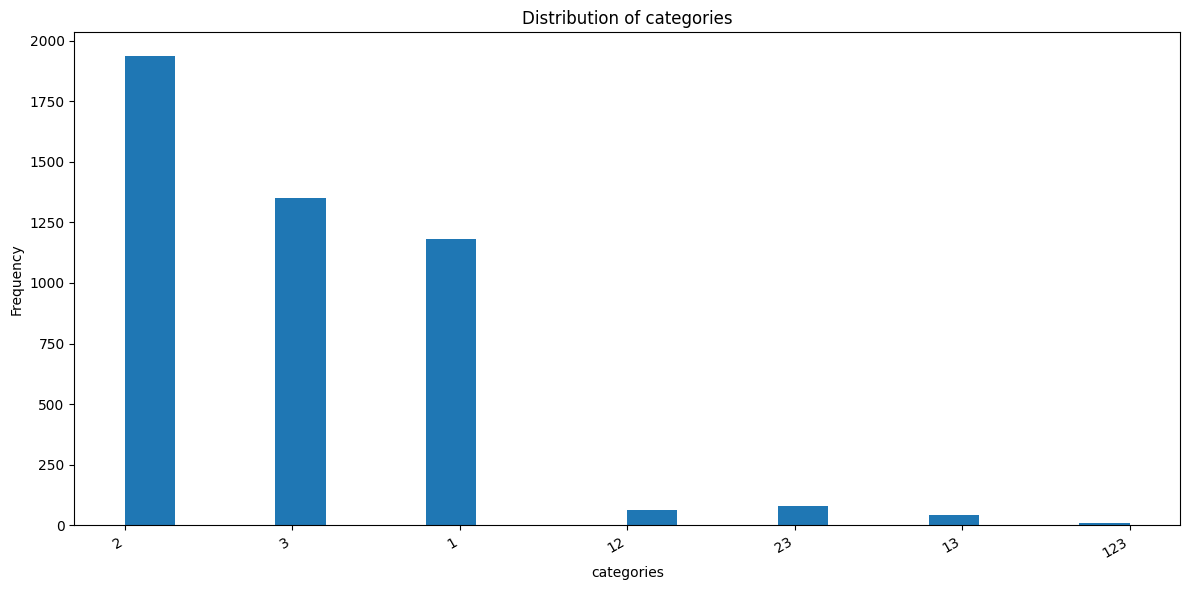

In [121]:
plt.figure(figsize=(12, 6))
plt.hist(pattern_df['categories'].dropna(), bins=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('categories')
plt.ylabel('Frequency')
plt.title('Distribution of categories')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [127]:
sample_contri.head()

,idx,Sites,Genus,abund_raw,rel_abund_raw,genome_EC_count,abund_contri,rel_abund_contri,norm_abund_contri,protein_name,...,pathways,hierarchy,metals_involved,metals_consolidated,corrosion_mechanisms,corrosion_relevance_score,corrosion_relevance,has_metal,Category,was_uncharacterized
0,502012,site_27,Afipia,267830.0,28.021013,2,535660.0,56.042026,0.353589,prephenate dehydratase,...,"Phenylalanine, tyrosine and tryptophan biosynt...","Amino acid metabolism > Phenylalanine, tyrosin...",potassium; phosphate; iron; sulfur; hydrogen; ...,K; phosphate; H; Mo; Mn; Se; Fe; S,h2_consumption; acid_production; sulfur_metabo...,20.0,high,True,2,False
1,562124,site_30,Anoxybacillus,32682.0,4.590262,2,65364.0,9.180525,0.054352,corrinoid adenosyltransferase alamin adenosylt...,...,Arginine biosynthesis; Arginine and proline me...,Cardiovascular disease > Viral myocarditis; Ne...,Mo; iron; zinc; hydrogen; selenium; nitrate; n...,H; Zn; Mo; NO3-; Se; Fe; NO2,h2_consumption; direct_eet,14.5,high,True,2,False
2,472739,site_25,Sphingomonas,1121.0,0.168339,1,1121.0,0.168339,0.001973,phosphoenolpyruvate carboxylase,...,Glycolysis / Gluconeogenesis; Citrate cycle (T...,Energy metabolism > Carbon fixation by Calvin ...,Mo; iron; sulfur; hydrogen; sodium; selenium; ...,H; phosphate; Mo; Se; Fe; S; Na,h2_consumption; acid_production,15.5,high,True,2,False
3,133617,site_7,Staphylococcus,7736.0,0.878632,1,7736.0,0.878632,0.940890,cystathionine gamma-lyase and homocysteine for...,...,Diterpenoid biosynthesis; Biosynthesis of seco...,Metabolism of terpenoids and polyketides > Dit...,selenium,Se,None,1.5,low,True,2,False
4,1136015,site_63,Bradyrhizobium,4161.0,0.613867,8,33288.0,4.910938,0.011502,acetolactate-synthase small subunit,...,"Valine, leucine and isoleucine biosynthesis; B...",Metabolism of cofactors and vitamins > Pantoth...,Al3+; Mo; iron; selenium; phosphate,phosphate; Mo; Se; Fe; Al3+,acid_production,10.5,high,True,2,False


In [124]:
#sample_contri  = sample_contri.drop(columns=["level_0", "index"], axis=1)
# Reset indexes to ensure proper merging
#pattern_df = pattern_df.reset_index(drop=True)
#sample_contri = sample_contri.drop(columns="index", axis=1)
#sample_contri = sample_contri.reset_index(drop=False)

In [132]:
# Reset indexes to ensure proper merging
#pattern_df = pattern_df.reset_index(drop=True)
#sample_contri = sample_contri.drop(columns="index", axis=1)
#sample_contri = sample_contri.reset_index(drop=False)
# Perform a single merge to get idx and all other needed columns
integrated_results = pd.merge(
    pattern_df,
    sample_contri[['idx', 'Genus', 'protein_name', 'enzyme_names', 'enzyme_class', 'pathways', 'hierarchy',
                 'metals_involved', 'metals_consolidated', 'corrosion_mechanisms',
                 'corrosion_relevance_score', 'corrosion_relevance', 'has_metal']],
    on=['Genus', 'protein_name'],
    how='left'
)
c
integrated_results.head()

NameError: name 'c' is not defined

In [ ]:
integrated_results = integrated_results.set_index("idx")
integrated_results = integrated_results.reset_index()

In [130]:
print(f"h_statistic unique values: {integrated_results['h_statistic'].unique()}, p_value unique values: {integrated_results['p_value'].unique()}")

h_statistic unique values: [nan], p_value unique values: [nan]


In [ ]:
pattern_df.columns

In [131]:
# Check how many rows matched during merge
before_count = len(pattern_df)
after_count = len(integrated_results)
print(f"Rows before merge: {before_count}, after merge: {after_count}")

# Verify idx values are matching
print(f"Unique idx values in pattern_df: {pattern_df['idx'].nunique()}")
print(f"Unique idx values in ECcontri_Uniprot_enriched: {sample_contri['idx'].nunique()}")
print(f"Rows with matching idx: {sum(pattern_df['idx'].isin(sample_contri['idx']))}")
# Check if these columns exist in pattern_df before the merge
print("Columns in pattern_df:", pattern_df.columns.tolist())
print("NaN counts in pattern_df:")
print(pattern_df.isna().sum())

# Check if these columns exist in eccontri_df before the merge
print("Columns in ECcontri_Uniprot_enriched:", sample_contri.columns.tolist())
print("NaN counts in ECcontri_Uniprot_enriched:")
print(sample_contri.isna().sum())

Rows before merge: 4668, after merge: 5000
Unique idx values in pattern_df: 4668
Unique idx values in ECcontri_Uniprot_enriched: 5000
Rows with matching idx: 4668
Columns in pattern_df: ['idx', 'Genus', 'protein_name', 'h_statistic', 'p_value', 'pattern', 'presence_pattern', 'category_count', 'categories', 'corr', 'mean_cat1', 'median_cat1', 'std_cat1', 'count_cat1', 'sum_cat1', 'mean_cat2', 'median_cat2', 'std_cat2', 'count_cat2', 'sum_cat2', 'mean_cat3', 'median_cat3', 'std_cat3', 'count_cat3', 'sum_cat3', 'effect_size_1_to_2', 'effect_size_2_to_3', 'total_abundance', 'log2fc_cat2_vs_cat1', 'log2fc_cat3_vs_cat1', 'log2fc_cat3_vs_cat2', 'idx_y']
NaN counts in pattern_df:
idx                       0
Genus                     0
protein_name              0
h_statistic            4668
p_value                4668
pattern                   0
presence_pattern          0
category_count            0
categories                0
corr                      0
mean_cat1              3370
median_cat1